🔍 First 2 Rows:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home    other  ...   

  famrel freetime  goout  Dalc  Walc health absences G1 G2 G3  
0      4        3      4     1     1      3        6  5  6  6  
1      5        3      3     1     1      3        4  5  5  6  

[2 rows x 33 columns]

📋 Inferred Data Types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64


<ipython-input-1-4129bef894ee>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-1-4129bef894ee>:77: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col_to_plot], shade=True)
<ipython-input-1-4129bef894ee>:80: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-4129bef894ee>:80: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-4129bef894ee>:80: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s

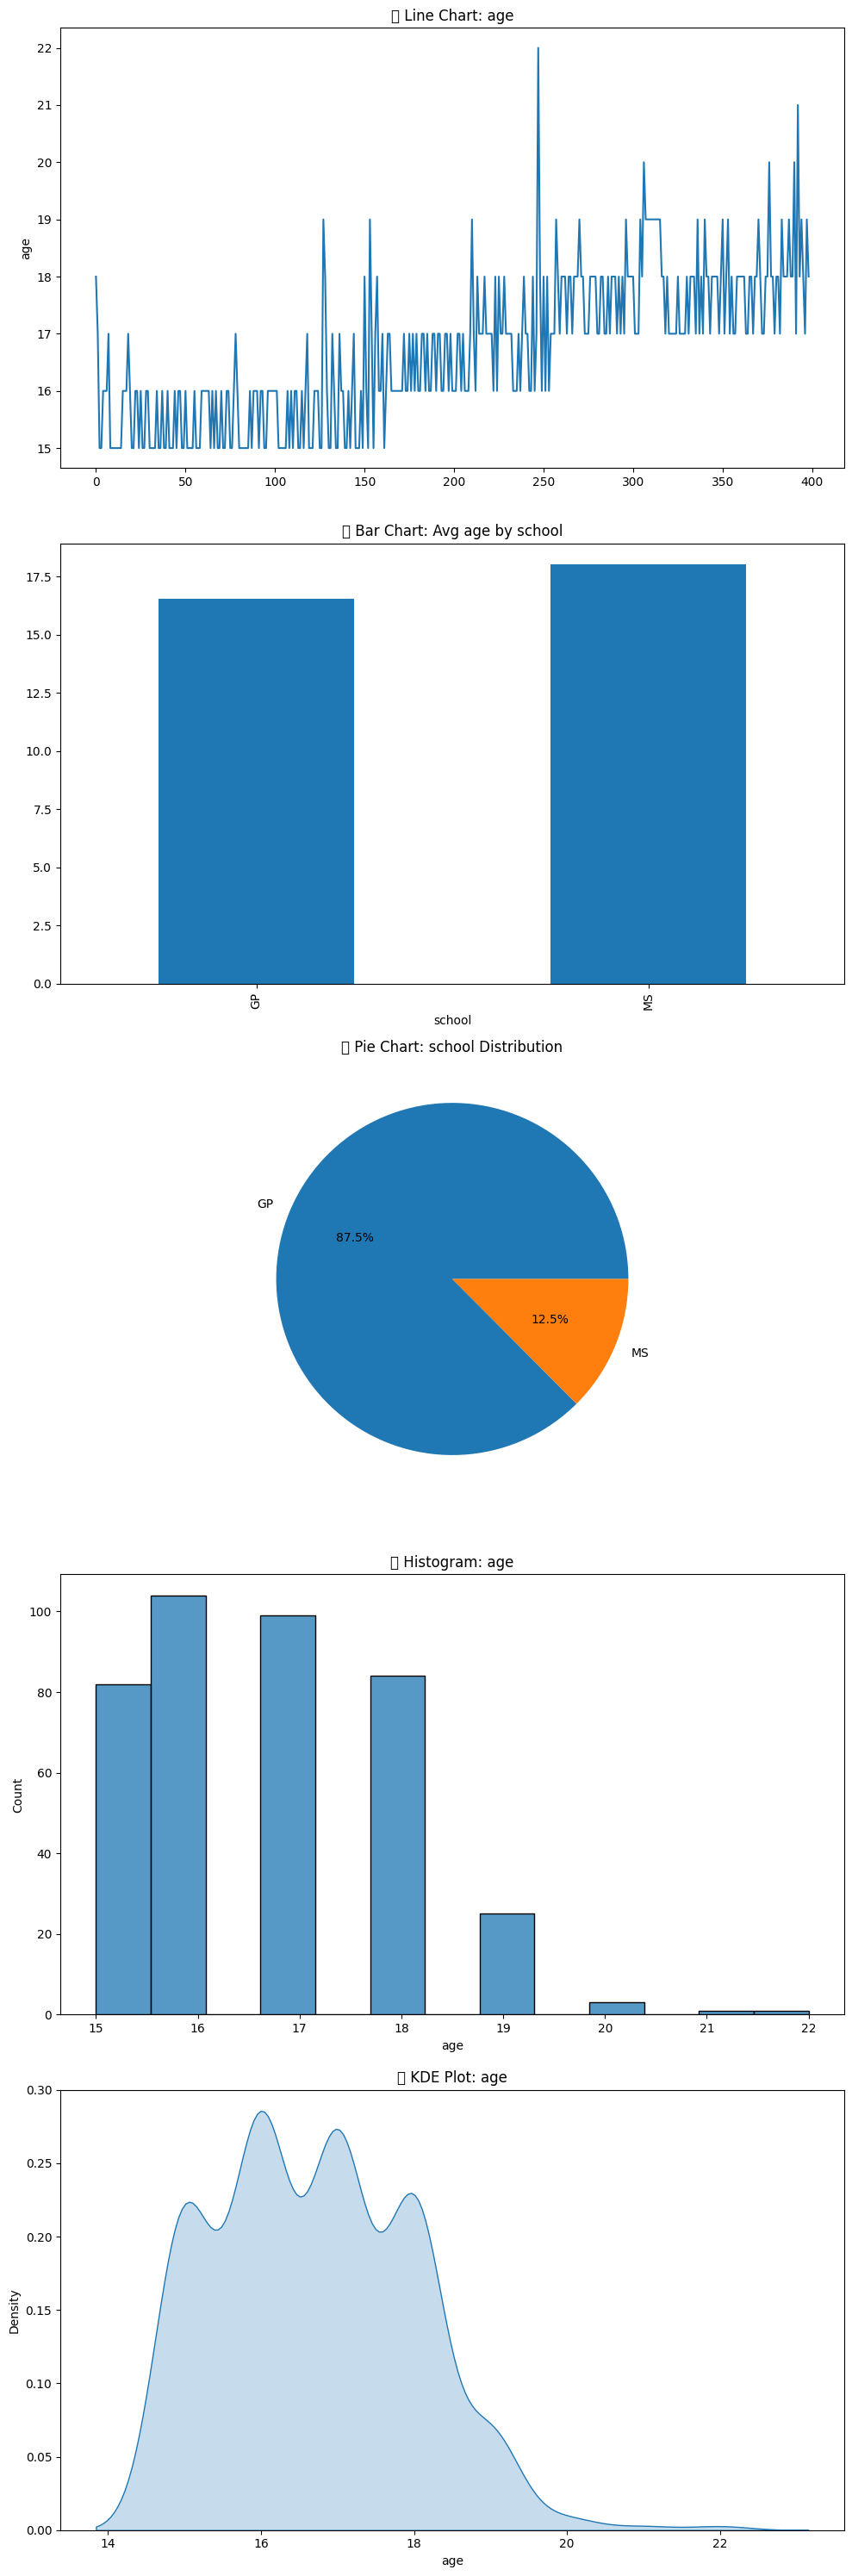

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Analyze first 2 rows
df_preview = pd.read_csv("Math-Students.csv", nrows=2)
print("🔍 First 2 Rows:")
print(df_preview)

print("\n📋 Inferred Data Types:")
print(df_preview.dtypes)

# Step 2: Load first 1000 rows
df = pd.read_csv("Math-Students.csv", nrows=1000)
print("\n📥 Initial Dataset (first 5 rows):")
print(df.head())

# Step 3: Drop columns with all missing values
df.dropna(axis=1, how='all', inplace=True)
print("\n🧹 After dropping columns with all NaN values:")
print(df.head())

# Step 4: Handle missing values (forward fill)
df.fillna(method='ffill', inplace=True)
print("\n🩹 After forward-filling missing values:")
print(df.head())

# Step 5: Remove duplicate columns
df = df.loc[:, ~df.T.duplicated()]
print("\n🔁 After removing duplicate columns:")
print(df.head())

# Step 6: Keep relevant columns
relevant_columns = df.select_dtypes(include=[np.number, 'object']).columns.tolist()
df = df[relevant_columns]
print("\n✅ After keeping relevant columns only:")
print(df.head())

# Step 7: Plot charts vertically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()

col_to_plot = numeric_cols[0] if numeric_cols else None

plt.figure(figsize=(10, 30))  # Tall figure for vertical plots

# 1. Line Chart
if col_to_plot:
    plt.subplot(5, 1, 1)
    sns.lineplot(data=df[col_to_plot])
    plt.title(f'📈 Line Chart: {col_to_plot}')

# 2. Bar Chart
if col_to_plot and object_cols:
    plt.subplot(5, 1, 2)
    df.groupby(object_cols[0])[col_to_plot].mean().sort_values().plot(kind='bar')
    plt.title(f'📊 Bar Chart: Avg {col_to_plot} by {object_cols[0]}')
    plt.xlabel(object_cols[0])

# 3. Pie Chart
if object_cols:
    plt.subplot(5, 1, 3)
    df[object_cols[0]].value_counts().head(5).plot.pie(autopct='%1.1f%%')
    plt.title(f'🥧 Pie Chart: {object_cols[0]} Distribution')
    plt.ylabel("")

# 4. Histogram
if col_to_plot:
    plt.subplot(5, 1, 4)
    sns.histplot(df[col_to_plot], kde=False)
    plt.title(f'📊 Histogram: {col_to_plot}')

# 5. KDE Plot
if col_to_plot:
    plt.subplot(5, 1, 5)
    sns.kdeplot(df[col_to_plot], shade=True)
    plt.title(f'📈 KDE Plot: {col_to_plot}')

plt.tight_layout()
plt.show()

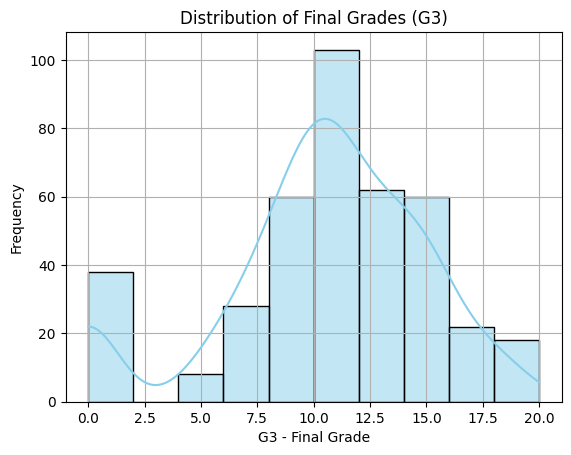

In [5]:
# Q1: What is the distribution of students' final grades (G3)?
# Ans: The histogram below shows the distribution of final grades (G3). Most students score between 8 and 15.

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['G3'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("G3 - Final Grade")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


<ipython-input-6-c2b35cb8d6cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='studytime', y='G3', palette='viridis')


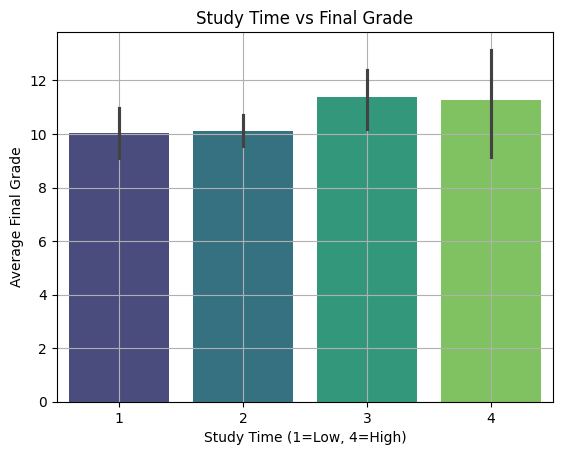

In [6]:
# Q2: How does study time relate to final grade?
# Ans: On average, higher study time is associated with better final grades.

sns.barplot(data=df, x='studytime', y='G3', palette='viridis')
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (1=Low, 4=High)")
plt.ylabel("Average Final Grade")
plt.grid(True)
plt.show()


<ipython-input-7-3de2306bb1aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sex', y='G3', palette='Set2')


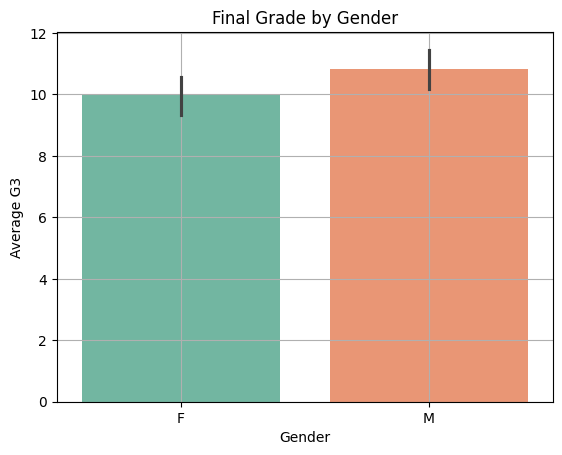

In [7]:
# Q3: Do male and female students perform differently on average?
# Ans: This plot compares the average final grade for each gender.

sns.barplot(data=df, x='sex', y='G3', palette='Set2')
plt.title("Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.grid(True)
plt.show()


<ipython-input-8-9a94b60127a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='famsize', y='G3', palette='coolwarm')


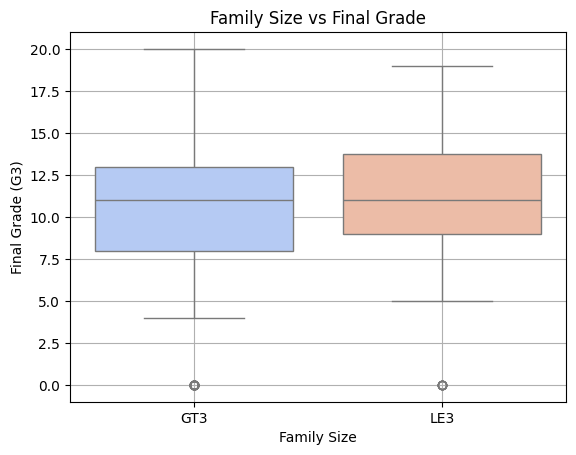

In [8]:
# Q4: Is there a difference in grades between students from small vs large families?
# Ans: Students from larger families tend to have similar or slightly lower grades.

sns.boxplot(data=df, x='famsize', y='G3', palette='coolwarm')
plt.title("Family Size vs Final Grade")
plt.xlabel("Family Size")
plt.ylabel("Final Grade (G3)")
plt.grid(True)
plt.show()


<ipython-input-9-7f9237cc2ba0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Walc', y='G3', palette='magma')


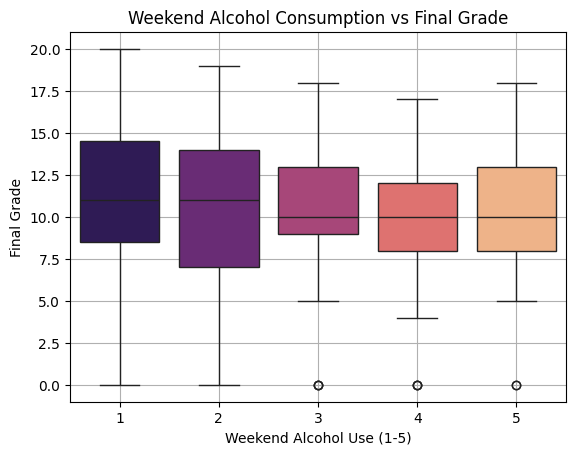

In [9]:
# Q5: Do students with high weekend alcohol consumption score lower?
# Ans: Higher weekend alcohol use tends to correlate with lower grades.

sns.boxplot(data=df, x='Walc', y='G3', palette='magma')
plt.title("Weekend Alcohol Consumption vs Final Grade")
plt.xlabel("Weekend Alcohol Use (1-5)")
plt.ylabel("Final Grade")
plt.grid(True)
plt.show()


<ipython-input-10-4c6b001d6347>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age', palette='Blues')


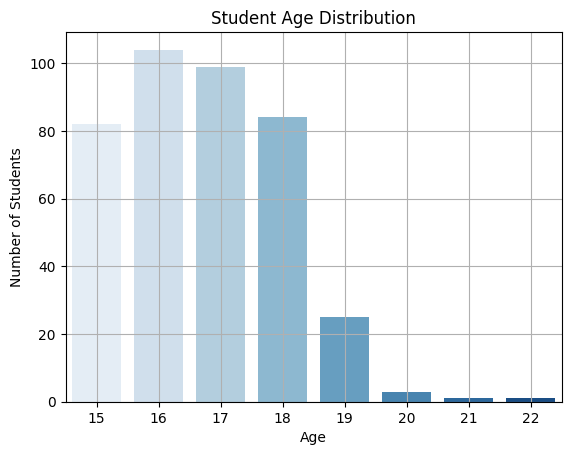

In [10]:
# Q6: What are the most common ages in this dataset?
# Ans: Most students are between 15 and 18 years old.

sns.countplot(data=df, x='age', palette='Blues')
plt.title("Student Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


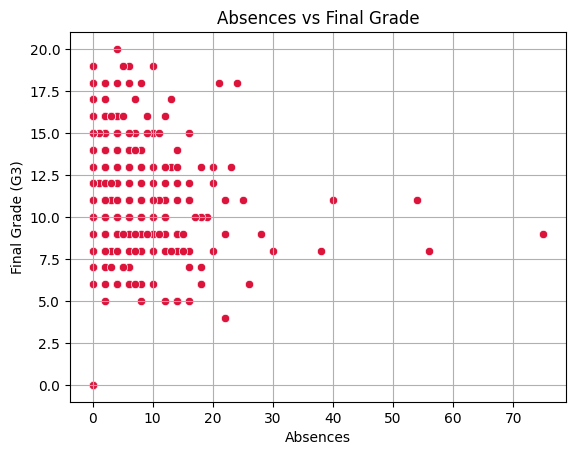

In [11]:
# Q7: Do more absences mean lower final grades?
# Ans: This scatterplot helps visualize any trend between absences and grades.

sns.scatterplot(data=df, x='absences', y='G3', color='crimson')
plt.title("Absences vs Final Grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade (G3)")
plt.grid(True)
plt.show()


<ipython-input-12-b149079df94b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Dalc', y='G3', palette='cool')


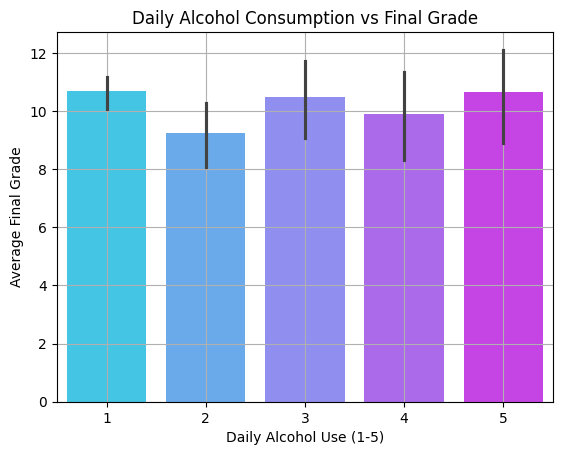

In [12]:
# Q8: Is there a drop in grades as daily alcohol consumption increases?
# Ans: Students with higher daily alcohol consumption generally have lower average grades.

sns.barplot(data=df, x='Dalc', y='G3', palette='cool')
plt.title("Daily Alcohol Consumption vs Final Grade")
plt.xlabel("Daily Alcohol Use (1-5)")
plt.ylabel("Average Final Grade")
plt.grid(True)
plt.show()


<ipython-input-13-679af75ddc9b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Mjob', y='G3', palette='Accent')


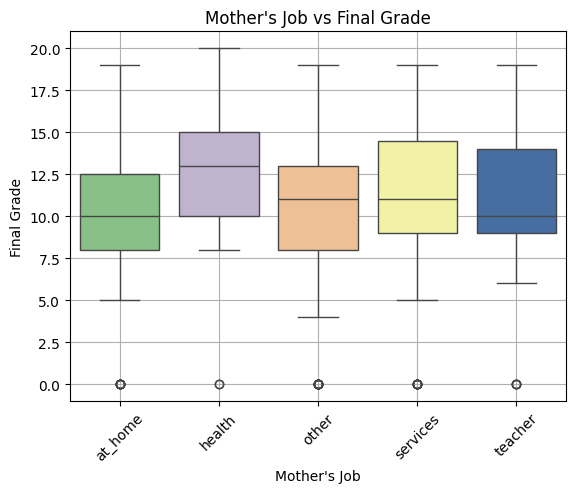

In [13]:
# Q9: Do students with mothers in certain professions perform better?
# Ans: This shows how G3 varies with mother's occupation.

sns.boxplot(data=df, x='Mjob', y='G3', palette='Accent')
plt.title("Mother's Job vs Final Grade")
plt.xlabel("Mother's Job")
plt.ylabel("Final Grade")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-14-41509a3af1a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='goout', y='G3', palette='cubehelix')


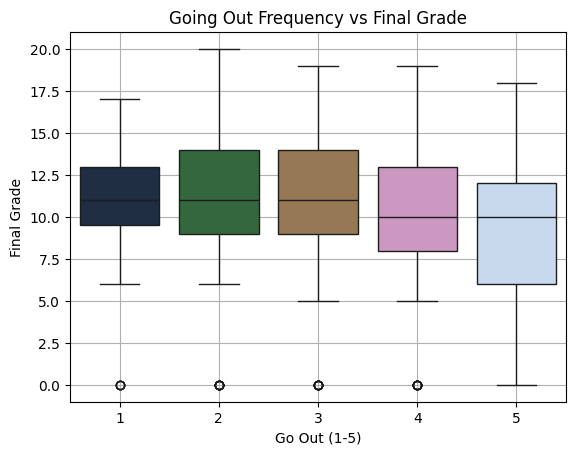

In [14]:
# Q10: Do students who go out more often have lower final grades?
# Ans: Students who frequently go out tend to score slightly lower.

sns.boxplot(data=df, x='goout', y='G3', palette='cubehelix')
plt.title("Going Out Frequency vs Final Grade")
plt.xlabel("Go Out (1-5)")
plt.ylabel("Final Grade")
plt.grid(True)
plt.show()
